# Imports


In [ ]:
# Basic Data Anaylsis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set()

In [ ]:
# Sklearn Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import validation_curve

# Sklearn Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Sklearn Optimizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Sklearn Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
# Tensorflow and Keras
import tensorflow as tf
#import tensorflow_hub as hub
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras import layers
from keras.utils import np_utils
from tensorflow.keras.preprocessing import text
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, bigrams, trigrams
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [ ]:
# Others

In [ ]:
# Ensures use of GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


# Importing Dataset

In [ ]:
# Reads Data From File
data = pd.read_csv('data/stackOverflowData.csv')
data = data.dropna()

In [ ]:
# Removes LQ_EDIT from database and resets the index
data = data[data.Y != 'LQ_EDIT']
data = data.reset_index()
data = data.drop(columns=['index'])

In [ ]:
data.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,1/1/2016 0:21,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,1/1/2016 2:03,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,1/1/2016 2:48,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,1/1/2016 3:30,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,1/1/2016 5:21,HQ


# Preproccessing

## Tag Data

In [ ]:
# Creates dataframe of tag data including a set of tags and the number of tags
# for each row
tag_df = pd.DataFrame()
tag_df['Tags'] = data['Tags'].apply(lambda x: set(x[1:-1].split('><')))
tag_df['Num_Tags'] = tag_df['Tags'].apply(lambda x: int(len(x)))
tag_df['Quality'] = data['Y']
tag_df

,Tags,Num_Tags,Quality
0,"{java, repeat}",2,LQ_CLOSE
1,"{java, optional}",2,HQ
2,"{opacity, overlay, javascript, react-native, i...",5,HQ
3,"{whitespace, operators, optional, ternary-oper...",5,HQ
4,"{floating-action-button, material-design, andr...",3,HQ
...,...,...,...
39994,"{flexbox, css, html}",3,LQ_CLOSE
39995,{c++},1,LQ_CLOSE
39996,"{c#, visual-studio}",2,LQ_CLOSE
39997,"{html, javascript, php}",3,LQ_CLOSE


In [ ]:
# Creates a pivot table and graphs the number of tags versus the quality
num_tags_pivot = pd.pivot_table(tag_df[['Num_Tags', 'Quality']], index=['Num_Tags'], columns=['Quality'], aggfunc=np.size, fill_value=0)
num_tags_pivot.head(24)

Quality,HQ,LQ_CLOSE
Num_Tags,,
1,5176,9552
2,10742,12506
3,11410,9734
4,7484,5200
5,5188,3006


<AxesSubplot:xlabel='Num_Tags'>

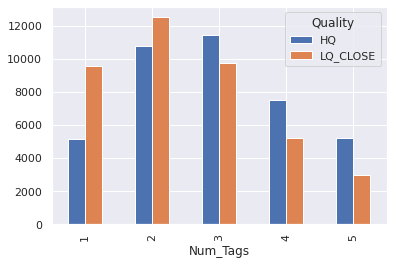

In [ ]:
num_tags_pivot.plot(kind='bar')

In [ ]:
# Creates a list of every tag in the dataframe
all_tags = ''.join(data['Tags'].tolist())[1:-1].split('><')
len(all_tags)

108181

In [ ]:
#Get the top N tags
N = 1000
tag_counts = Counter(all_tags)
top_tags = {tag for tag, count in tag_counts.most_common(N)}
print(f"The top N tags are {top_tags}")

The top N tags are {'build.gradle', 'service', 'count', 'null', 'css', 'swiftui', 'oauth-2.0', 'angular2-directives', 'datepicker', 'html5-video', 'graph', 'rabbitmq', 'identityserver4', 'hive', 'wpf', 'ajax', 'create-react-app', 'xamarin.ios', 'azure-active-directory', '.htaccess', 'nsdate', 'google-cloud-firestore', 'switch-statement', 'composer-php', 'seo', 'retrofit', 'leaflet', 'mongodb', 'twitter-bootstrap-3', 'conditional', 'audio', 'amazon-ecs', 'dataset', 'pygame', 'utf-8', 'python-3.6', 'static', 'ruby-on-rails', 'unity3d', 'gitlab-ci', 'ssl-certificate', 'version-control', 'keras', 'ubuntu-16.04', 'entity-framework-core', 'nuget', 'plot', 'immutability', 'karma-runner', 'android-edittext', 'facebook-graph-api', 'bit-manipulation', 'cmake', 'lodash', 'google-chrome', 'cordova', 'promise', 'angular-reactive-forms', 'intellij-idea', 'android-constraintlayout', 'windows-subsystem-for-linux', 'qt', 'cloud', 'reverse', 'max', 'virtualbox', 'google-cloud-functions', 'orm', 'asynchr

In [ ]:
# Removes all but the top N tags from the tag_df
tag_df['Tags'] = tag_df['Tags'].apply(lambda x: top_tags.intersection(x))

In [ ]:
tag_df

,Tags,Num_Tags,Quality
0,{java},2,LQ_CLOSE
1,"{java, optional}",2,HQ
2,"{react-native, javascript, image}",5,HQ
3,"{operators, swift, optional}",5,HQ
4,"{material-design, android}",3,HQ
...,...,...,...
39994,"{flexbox, css, html}",3,LQ_CLOSE
39995,{c++},1,LQ_CLOSE
39996,"{c#, visual-studio}",2,LQ_CLOSE
39997,"{javascript, php, html}",3,LQ_CLOSE


In [ ]:
# Represents every tag in the top N tags as a number
sorted_tags = sorted(list(top_tags))
tag_to_int = {tag: i for i, tag in enumerate(sorted_tags)}

tag_df['Tags'] = tag_df['Tags'].apply(lambda x: {tag_to_int[tag] for tag in x})

In [ ]:
tag_df

,Tags,Num_Tags,Quality
0,{471},2,LQ_CLOSE
1,"{628, 471}",2,HQ
2,"{427, 716, 477}",5,HQ
3,"{849, 626, 628}",5,HQ
4,"{552, 24}",3,HQ
...,...,...,...
39994,"{328, 228, 415}",3,LQ_CLOSE
39995,{156},1,LQ_CLOSE
39996,"{153, 938}",2,LQ_CLOSE
39997,"{477, 654, 415}",3,LQ_CLOSE


In [ ]:
# Encodes the tags with One Hot encoding to represent them
def to_onehot(tags):
    out = np.zeros(N)
    for t in tags:
        out[t] = 1
    return out

tag_df['Onehots'] = tag_df['Tags'].apply(lambda x: to_onehot(x))
tag_df['Onehots']

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
39994    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
39995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
39996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
39997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
39998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Onehots, Length: 39999, dtype: object

In [ ]:
# Makes it so that every possible tag has its own column associated with it
one_hot_tag_np = np.stack(tag_df['Onehots'].to_numpy())
one_hot_tag_df = pd.DataFrame(data=one_hot_tag_np)

In [ ]:
# Dataframe holding the one hot encoded possible tags
one_hot_tag_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dataframe holding the number of tags for each value
num_tags_df = tag_df['Num_Tags']
num_tags_df.head()

0    2
1    2
2    5
3    5
4    3
Name: Num_Tags, dtype: int64

## Hour Data

In [ ]:
# Gets rid of SettingWithCopyWarning that has no negative affect on result
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Gets the quality by hour that the post was created
quality_by_hour = data[['CreationDate','Y']]
quality_by_hour['CreationDate'] = pd.to_datetime(quality_by_hour['CreationDate'], errors='coerce', format="%m/%d/%Y %H:%M")
quality_by_hour = quality_by_hour.rename(columns={"CreationDate": "Hour", "Y": "Quality"})
quality_by_hour['Hour'] = quality_by_hour['Hour'].dt.strftime('%H')
quality_by_hour.head()

,Hour,Quality
0,00,LQ_CLOSE
1,02,HQ
2,02,HQ
3,03,HQ
4,05,HQ


In [ ]:
hour_df = quality_by_hour['Hour']
hour_df.head()

0    00
1    02
2    02
3    03
4    05
Name: Hour, dtype: object

## Body Format Data

### Body Has Code

In [ ]:
# Checks to see if the Body of the post has code embeded 
body_has_code = pd.DataFrame() 
body_has_code['Code'] = data['Body'].apply(lambda x: int('<code>' in x))
body_has_code['Quality'] = data['Y']
body_has_code.head()

,Code,Quality
0,0,LQ_CLOSE
1,0,HQ
2,1,HQ
3,1,HQ
4,0,HQ


### Body Has an Image

In [ ]:
# Checks to see if the Body of the post has an image embeded 
body_has_img = pd.DataFrame() 
body_has_img['Img'] = data['Body'].apply(lambda x: int('<img' in x))
body_has_img['Quality'] = data['Y']
body_has_img.head()

,Img,Quality
0,0,LQ_CLOSE
1,0,HQ
2,1,HQ
3,0,HQ
4,0,HQ


### Body Has a URL

In [ ]:
# Checks to see if the Body of the post has a url embeded 
body_has_url = pd.DataFrame() 
body_has_url['Url'] = data['Body'].apply(lambda x: int('<a href' in x))
body_has_url['Quality'] = data['Y']
body_has_url.head()

,Url,Quality
0,0,LQ_CLOSE
1,0,HQ
2,1,HQ
3,0,HQ
4,1,HQ


###Body Has Lists

In [ ]:
# Checks to see if the Body of the post has lists embeded 
body_has_list = pd.DataFrame() 
body_has_list['List'] = data['Body'].apply(lambda x: int('<ul>' in x or '<ol>' in x or '<li>' in x or '<dl>' in x or '<dt>' in x or '<dd>' in x))
body_has_list['Quality'] = data['Y']
body_has_list.head()

,List,Quality
0,0,LQ_CLOSE
1,0,HQ
2,0,HQ
3,0,HQ
4,0,HQ


### Number of Paragraphs

In [ ]:
# Counts the number of paragraphs in the body
body_paragraph_count = pd.DataFrame() 
body_paragraph_count['Count'] = data['Body'].apply(lambda x: x.count('<p>'))
body_paragraph_count['Quality'] = data['Y']
body_paragraph_count.head()

,Count,Quality
0,1,LQ_CLOSE
1,1,HQ
2,3,HQ
3,8,HQ
4,2,HQ


In [ ]:
# Combines all of the body format data into one dataframe
format_df = pd.DataFrame()
format_df['Code'] = body_has_code['Code']
format_df['Img'] = body_has_img['Img']
format_df['Url'] = body_has_url['Url']
format_df['List'] = body_has_list['List']
format_df['Paragraphs'] = body_paragraph_count['Count']
format_df

,Code,Img,Url,List,Paragraphs
0,0,0,0,0,1
1,0,0,0,0,1
2,1,1,1,0,3
3,1,0,0,0,8
4,0,0,1,0,2
...,...,...,...,...,...
39994,1,1,1,0,6
39995,1,0,0,0,2
39996,0,0,0,0,3
39997,1,0,1,0,2


## Title Format Data

###Title Length

In [ ]:
# Separates title and quality into new dataframe
quality_by_title = data[['Title','Y']]
quality_by_title.head()

,Title,Y
0,Java: Repeat Task Every Random Seconds,LQ_CLOSE
1,Why are Java Optionals immutable?,HQ
2,Text Overlay Image with Darkened Opacity React...,HQ
3,Why ternary operator in swift is so picky?,HQ
4,hide/show fab with scale animation,HQ


### Import Stop Words

In [ ]:
# Reads stopwords data from file
stopwords_path = 'data/stopwords.txt'

stop_words = []

with open(stopwords_path, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  
print(stop_words)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [ ]:
# Applies preprocessing to text
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [ ]:
# Applies preprocessing to title and saves it into a new column
quality_by_title['Preprocess'] = quality_by_title['Title'].apply(preprocess)
quality_by_title.head()

,Title,Y,Preprocess
0,Java: Repeat Task Every Random Seconds,LQ_CLOSE,java repeat task random second
1,Why are Java Optionals immutable?,HQ,java option immut
2,Text Overlay Image with Darkened Opacity React...,HQ,text overlay imag darken opac react nativ
3,Why ternary operator in swift is so picky?,HQ,ternari oper swift picki
4,hide/show fab with scale animation,HQ,hide show fab scale anim


In [ ]:
# Finds length of preprocessed title
title_length_df = pd.DataFrame()
title_length_df['Length'] = quality_by_title['Preprocess'].apply(lambda x: len(x) - x.count(" "))
title_length_df.head()

,Length
0,26
1,15
2,35
3,21
4,20


## Title and Body Text Data


In [ ]:
# Separates body from dataframe
body_text= data[['Body']]
body_text.head()

,Body
0,<p>I'm already familiar with repeating tasks e...
1,<p>I'd like to understand why Java 8 Optionals...
2,<p>I am attempting to overlay a title over an ...
3,"<p>The question is very simple, but I just cou..."
4,<p>I'm using custom floatingactionmenu. I need...


In [ ]:
# Applies preprocessing to body
body_text['preproc'] = body_text['Body'].apply(preprocess)
body_text.head()

,Body,preproc
0,<p>I'm already familiar with repeating tasks e...,familiar repeat task second java util timer ja...
1,<p>I'd like to understand why Java 8 Optionals...,understand java option design immut thread safeti
2,<p>I am attempting to overlay a title over an ...,attempt overlay titl imag imag darken lower op...
3,"<p>The question is very simple, but I just cou...",question simpl find answer doesn pre code retu...
4,<p>I'm using custom floatingactionmenu. I need...,custom floatingactionmenu implement scale anim...


In [ ]:
# Combines title and body into one text column
text_data = data[['Title','Body','Y']]
text_data['text'] = quality_by_title['Preprocess'] + ' ' + body_text['preproc']
text_data['Y'] = text_data['Y'].map({'LQ_CLOSE':0, 'HQ':1})
text_data = text_data.drop(['Title','Body'], axis = 1)
text_data.head()

,Y,text
0,0,java repeat task random second familiar repeat...
1,1,java option immut understand java option desig...
2,1,text overlay imag darken opac react nativ atte...
3,1,ternari oper swift picki question simpl find a...
4,1,hide show fab scale anim custom floatingaction...


## Combined Data

In [ ]:
# Combines all the features into one dataframe
X = pd.concat([text_data['text'],one_hot_tag_df, format_df, num_tags_df, hour_df, title_length_df], axis=1)
X.head()

,text,0,1,2,3,4,5,6,7,8,...,998,999,Code,Img,Url,List,Paragraphs,Num_Tags,Hour,Length
0,java repeat task random second familiar repeat...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,2,00,26
1,java option immut understand java option desig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,2,02,15
2,text overlay imag darken opac react nativ atte...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,1,1,0,3,5,02,35
3,ternari oper swift picki question simpl find a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,8,5,03,21
4,hide show fab scale anim custom floatingaction...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,0,2,3,05,20


In [ ]:
# Saves quality to y
y = data.reset_index()['Y'].map({'LQ_CLOSE':0,'HQ':1})

## Split and Standardize the Data

In [ ]:
# Split X and y into train/test data
np_X = X.values
np_y = y.values
X_train, X_test, y_train, y_test = train_test_split(np_X, np_y, test_size=0.30, random_state=42)

In [ ]:
# Separates text data after split
X_train_text, X_test_text = X_train[:,0], X_test[:,0]

In [ ]:
X_train_text[0]

'class method selector static swift method object object code add extra function unfamiliar object possibl swift optim swift file class pre code import foundat import uikit objc class imagebars nsobject static func changecontadorimages img uiimag newsiz cgsize gt uiimag uigraphicsbeginimagecontextwithopt newsiz true cgfloat cgfloat img draw cgrect width newsiz width height newsiz height newimag uiimag uigraphicsgetimagefromcurrentimagecontext uigraphicsendimagecontext return newimag code pre code object file pre code imgbarcount uiimag imagenam bar counter pd png imag imagebars changecontadorimages imgbarcount newsiz cgsizemak code pre error class method selector changecontadorimages newsiz bridg process pre code import lt wh live swift gt code pre begin file work fine ve look similar error thread avail'

In [ ]:
X_test_text[0]

'view layout work android fragment creat view android fragment good amount research unsur strong em fragment em strong appear possibl layout incorrect android href http stack imgur dh pk png rel nofollow noreferr img src http stack imgur dh pk png alt attempt fragment layout'

In [ ]:
# Separates numerical data after split and applies preprocessing to the non
# binary data
scaler = preprocessing.StandardScaler().fit(X_train[:,-4:])
X_train_scaled = np.concatenate(( X_train[:,1:-4], scaler.transform(X_train[:,-4:])), axis=1)
X_test_scaled = np.concatenate(( X_test[:,1:-4], scaler.transform(X_test[:,-4:])), axis=1)

In [ ]:
X_train_scaled[0]

array([0.0, 0.0, 0.0, ..., 1.055248441405339, 1.3744972333935002,
       1.206750776448847], dtype=object)

# Machine Learning

Here we create two machine learning models and combine them for a final prediction. We separate the text and numerical data into two models due to the complexity of combining the data into one. Also we wanted to apply a MLP model onto as much of the data as we could but the text data was too large to feasibly do so, so we apply a MLP model to only the numerical data and a Logistic Regression model to the text.

After, we mutiply each algorithms predicted proabilites by their accuracies to give them their weights. Then combine them and normalize them by their weights to get a final prediction probability. Which ends up being more accurate than the separated data showing that both models add value to the predictions.

## NN on Formatting and Tags

In [ ]:
# Creating MLP Classifier Model
mlp = MLPClassifier()

In [ ]:
# Setting up possible parameter space for applying a grid search on the MLP Model
parameter_space = {
    'random_state': [1],
    'activation': ['relu'],
    'learning_rate': ['constant'],
    'solver': ['adam'],
    'early_stopping': [True],
    'validation_fraction': [.2],
    'hidden_layer_sizes': [(300,),(128,128), (256,256), (256,128,64)],
    'alpha': [.05, .001],
    'batch_size': [64, 128, 256]

}

In [ ]:
X_train_scaled.shape

(27999, 1008)

In [ ]:
# Applying Grid Search Cross Validation on the parameter space
GCV = GridSearchCV(mlp, parameter_space, n_jobs=-1, verbose=3)
GCV.fit(X_train_scaled[:5000], y_train[:5000])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.4min finished


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05, 0.001],
                         'batch_size': [64, 128, 256], 'early_stopping': [True],
                         'hidden_layer_sizes': [(300,), (128, 128), (256, 256),
                                                (256, 128, 64)],
                         'learning_rate': ['constant'], 'random_state': [1],
                         'solver': ['adam'], 'validation_fraction': [0.2]},
             verbose=3)

In [ ]:
# Prints the parameters with the best results
print('Best parameters found:\n', GCV.best_params_)

# All results
means = GCV.cv_results_['mean_test_score']
stds = GCV.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'batch_size': 128, 'early_stopping': True, 'hidden_layer_sizes': (128, 128), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam', 'validation_fraction': 0.2}
0.840 (+/-0.015) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam', 'validation_fraction': 0.2}
0.840 (+/-0.007) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (128, 128), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam', 'validation_fraction': 0.2}
0.840 (+/-0.014) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (256, 256), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam', 'validation_fraction': 0.2}
0.836 (+/-0.030) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 64, 'early_

In [ ]:
# After multiple trials, we have concluded that these are the optimal parameters
# Sets up MLP model with optimal parameters
mlp = MLPClassifier(random_state=1, activation='relu', alpha= 0.05, hidden_layer_sizes=(300,), learning_rate='constant', solver='adam', early_stopping=True, validation_fraction=0.2,).fit(X_train_scaled, y_train)

0.8883174399085682


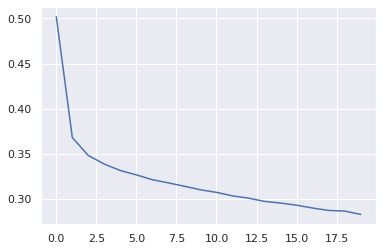

In [ ]:
# Plots training score and loss curve
print (mlp.score(X_train_scaled,y_train))
plt.plot(mlp.loss_curve_)

In [ ]:
# Predicts values of test data
mlp_predictions = mlp.predict(X_test_scaled)

In [ ]:
# Prints accuracy, confusion matrix, and classification report of predictions
print(accuracy_score(y_test, mlp_predictions))
print(confusion_matrix(y_test, mlp_predictions))
print(classification_report(y_test, mlp_predictions))

0.8606666666666667
[[5137  848]
 [ 824 5191]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5985
           1       0.86      0.86      0.86      6015

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



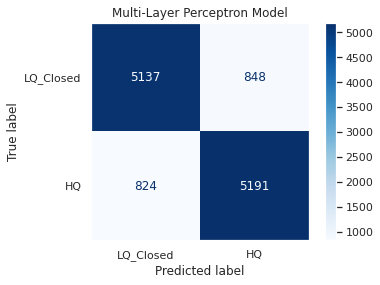

In [ ]:
#Plot Confusion Matrix -- this is done on the test set 
labels_names = ('LQ_Closed', 'HQ')
disp = plot_confusion_matrix(mlp, X_test_scaled, y_test, display_labels=labels_names,cmap=plt.cm.Blues, values_format = '.5g')
disp.ax_.set_title("Multi-Layer Perceptron Model")
plt.grid(False)
plt.show()

## LR on Text Data

In [ ]:
# Load the vectorizer, fit on training set, transform on validation set
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train_text)
X_test_text = vectorizer.transform(X_test_text)

As you can see, the numerical and text data is of different forms and combining them will be difficult and create an extremely large database to work off of. So we will continue working on the text data separatly

In [ ]:
print(type(X_train_text))
print(type(X_train_scaled))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [ ]:
print(X_train_text.shape)
print(X_train_scaled.shape)

(27999, 77791)
(27999, 1008)


In [ ]:
# Testing different models on the text dat to find the optimal one
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('PER', Perceptron()))
models.append(('SGD', SGDClassifier()))


In [ ]:
# evaluate each model in turn, but only with training data set using 10-fold CV
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train_text, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.855781 (0.008195)
KNN: 0.770242 (0.007870)
PER: 0.820530 (0.008294)
SGD: 0.856281 (0.009113)


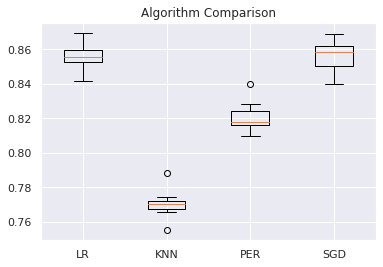

In [ ]:

# Box plot of the results
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
# Create a LR Classifier on text data
lr_classifier = LogisticRegression(C=1., max_iter=500)
lr_classifier.fit(X_train_text, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Fit the model and make predictions on test data
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train_text, y_train)
lr_predictions = model.predict(X_test_text)

In [ ]:
# Evaluate predictions -- this is done only on the test set
print(accuracy_score(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

0.8579166666666667
[[5125  860]
 [ 845 5170]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5985
           1       0.86      0.86      0.86      6015

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



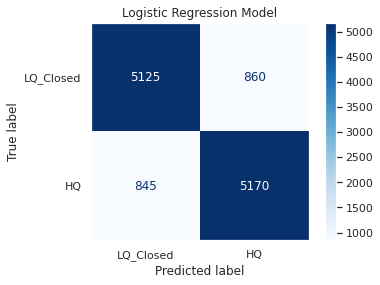

In [ ]:
#Plot Confusion Matrix -- this is done on the test set 
disp = plot_confusion_matrix(lr_classifier, X_test_text, y_test,display_labels=labels_names ,cmap=plt.cm.Blues, values_format = '.5g')
disp.ax_.set_title("Logistic Regression Model")
plt.grid(False)
plt.show()

In [ ]:
print (lr_classifier.score(X_train_text,y_train))

0.8950319654273367


## Combining the Models

Now that we have our two models, we must get the probabilities of both models and combine them to make our final predictions.

In [ ]:
# Obtain probability and accuracy of MLP model
MLP_Probs = mlp.predict_proba(X_test_scaled)
MLP_Accuracy = mlp.score(X_test_scaled, y_test)

In [ ]:
# Obtain probability and accuracy of LR model
LR_Probs = lr_classifier.predict_proba(X_test_text)
LR_Accuracy = lr_classifier.score(X_test_text, y_test)

In [ ]:
print(MLP_Probs)
print(MLP_Accuracy)

[[0.7650698  0.2349302 ]
 [0.03924482 0.96075518]
 [0.86567757 0.13432243]
 ...
 [0.94556583 0.05443417]
 [0.29815181 0.70184819]
 [0.01712074 0.98287926]]
0.8606666666666667


In [ ]:
print(LR_Probs)
print(LR_Accuracy)

[[0.48796565 0.51203435]
 [0.0922851  0.9077149 ]
 [0.87624787 0.12375213]
 ...
 [0.98429323 0.01570677]
 [0.67762448 0.32237552]
 [0.63043428 0.36956572]]
0.8579166666666667


In [ ]:
# Combine probabilities using the accuracies as weights
Final_Prediction_Probs = (MLP_Probs*MLP_Accuracy + LR_Probs*LR_Accuracy) / (MLP_Accuracy + LR_Accuracy)

In [ ]:
Final_Prediction_Probs

array([[0.62673943, 0.37326057],
       [0.06572252, 0.93427748],
       [0.87095426, 0.12904574],
       ...,
       [0.96489854, 0.03510146],
       [0.48758453, 0.51241547],
       [0.32328681, 0.67671319]])

In [ ]:
Final_Prediction_Probs.shape

(12000, 2)

In [ ]:
# Make predictions based on final probabilites
Final_Predictions = np.zeros(Final_Prediction_Probs.shape[0])
for index,probs in enumerate(Final_Prediction_Probs):
  if probs[1] > probs[0]:
    Final_Predictions[index] = 1

In [ ]:
Final_Predictions

array([0., 1., 0., ..., 0., 1., 1.])

In [ ]:
# Prints accuracy, confusion matrix, and classification report of predictions
print(accuracy_score(y_test, Final_Predictions))
print(confusion_matrix(y_test, Final_Predictions))
print(classification_report(y_test, Final_Predictions))

0.8880833333333333
[[5301  684]
 [ 659 5356]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5985
           1       0.89      0.89      0.89      6015

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [ ]:
Final_Predictions.shape

(12000,)

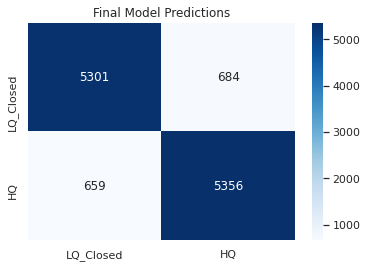

In [ ]:
cm = confusion_matrix(y_test, Final_Predictions)
ax = plt.axes()
f = sns.heatmap(cm, ax =ax ,annot=True ,xticklabels=labels_names, yticklabels=labels_names, cmap=plt.cm.Blues,fmt='g')
ax.set_title('Final Model Predictions')
ax.set_xlabel = 'Predicted Label'
ax.set_ylabel = 'True Label'
plt.grid(False)

These are the final results of each of the models: Combined, LR only, and MLP only. As you can see, combining the models improves the overall accuracy by about 3%.

In [ ]:
# Combined
print(accuracy_score(y_test, Final_Predictions))
print(confusion_matrix(y_test, Final_Predictions))
print(classification_report(y_test, Final_Predictions))
print(Final_Predictions[:20])
print(y_test[:20])

0.8880833333333333
[[5301  684]
 [ 659 5356]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5985
           1       0.89      0.89      0.89      6015

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

[0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
[0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1]


In [ ]:
#LR
print(accuracy_score(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print(lr_predictions[:20])
print(y_test[:20])

0.8579166666666667
[[5125  860]
 [ 845 5170]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5985
           1       0.86      0.86      0.86      6015

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

[1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1]
[0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1]


Text(0.5, 1.0, 'Logistic Regression Precision-Recall curve: AP=0.93')

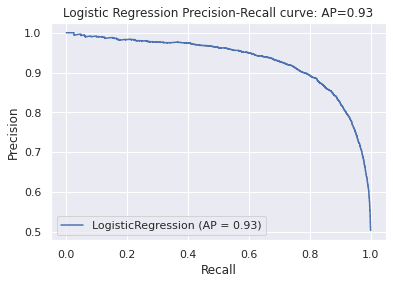

In [ ]:
lr_y_score = lr_classifier.decision_function(X_test_text)
lr_average_precision = average_precision_score(y_test, lr_y_score)

lr_prec_recall = plot_precision_recall_curve(lr_classifier, X_test_text, y_test)
lr_prec_recall.ax_.set_title('Logistic Regression Precision-Recall curve: '
                   'AP={0:0.2f}'.format(lr_average_precision))

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

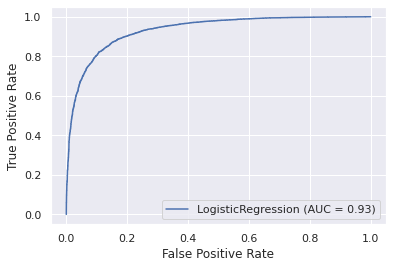

In [ ]:
lr_disp = plot_roc_curve(lr_classifier, X_test_text, y_test)
plt.show()

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

In [ ]:
#MLP
print(accuracy_score(y_test, mlp_predictions))
print(confusion_matrix(y_test, mlp_predictions))
print(classification_report(y_test, mlp_predictions))
print(mlp_predictions[:20])
print(y_test[:20])

0.8606666666666667
[[5137  848]
 [ 824 5191]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5985
           1       0.86      0.86      0.86      6015

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

[0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1]
[0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1]


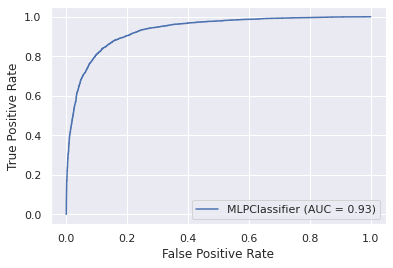

In [ ]:
mlp_disp = plot_roc_curve(mlp, X_test_scaled, y_test)
plt.show()

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.